In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("/content/sample_data/Amazon.csv")

df.head()

,OrderID,OrderDate,CustomerID,CustomerName,ProductID,ProductName,Category,Brand,Quantity,UnitPrice,Discount,Tax,ShippingCost,TotalAmount,PaymentMethod,OrderStatus,City,State,Country,SellerID
0,ORD0000001,2023-01-31,CUST001504,Vihaan Sharma,P00014,Drone Mini,Books,BrightLux,3,106.59,0.00,0.00,0.09,319.86,Debit Card,Delivered,Washington,DC,India,SELL01967
1,ORD0000002,2023-12-30,CUST000178,Pooja Kumar,P00040,Microphone,Home & Kitchen,UrbanStyle,1,251.37,0.05,19.10,1.74,259.64,Amazon Pay,Delivered,Fort Worth,TX,United States,SELL01298
2,ORD0000003,2022-05-10,CUST047516,Sneha Singh,P00044,Power Bank 20000mAh,Clothing,UrbanStyle,3,35.03,0.10,7.57,5.91,108.06,Debit Card,Delivered,Austin,TX,United States,SELL00908
3,ORD0000004,2023-07-18,CUST030059,Vihaan Reddy,P00041,Webcam Full HD,Home & Kitchen,Zenith,5,33.58,0.15,11.42,5.53,159.66,Cash on Delivery,Delivered,Charlotte,NC,India,SELL01164
4,ORD0000005,2023-02-04,CUST048677,Aditya Kapoor,P00029,T-Shirt,Clothing,KiddoFun,2,515.64,0.25,38.67,9.23,821.36,Credit Card,Cancelled,San Antonio,TX,Canada,SELL01411


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   OrderID        100000 non-null  object 
 1   OrderDate      100000 non-null  object 
 2   CustomerID     100000 non-null  object 
 3   CustomerName   100000 non-null  object 
 4   ProductID      100000 non-null  object 
 5   ProductName    100000 non-null  object 
 6   Category       100000 non-null  object 
 7   Brand          100000 non-null  object 
 8   Quantity       100000 non-null  int64  
 9   UnitPrice      100000 non-null  float64
 10  Discount       100000 non-null  float64
 11  Tax            100000 non-null  float64
 12  ShippingCost   100000 non-null  float64
 13  TotalAmount    100000 non-null  float64
 14  PaymentMethod  100000 non-null  object 
 15  OrderStatus    100000 non-null  object 
 16  City           100000 non-null  object 
 17  State          100000 non-null

In [10]:


print(df.columns)

Index(['OrderID', 'OrderDate', 'CustomerID', 'CustomerName', 'ProductID',
       'ProductName', 'Category', 'Brand', 'Quantity', 'UnitPrice', 'Discount',
       'Tax', 'ShippingCost', 'TotalAmount', 'PaymentMethod', 'OrderStatus',
       'City', 'State', 'Country', 'SellerID', 'sales', 'Year', 'Month', 'Day',
       'YearMonth'],
      dtype='object')


In [11]:


df.duplicated().sum()

np.int64(0)

In [12]:
df.isnull()

df.isnull().sum()

,0
OrderID,0
OrderDate,0
CustomerID,0
CustomerName,0
ProductID,0
ProductName,0
Category,0
Brand,0
Quantity,0
UnitPrice,0


In [ ]:
df["sales"] = df ["Quantity"] * df ["UnitPrice"]

print(df)

In [13]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'], format='%Y-%m-%d')
print(df.dtypes)

df['Year'] = df['OrderDate'].dt.year
df['Month'] = df['OrderDate'].dt.month
df['Day'] = df['OrderDate'].dt.day


OrderID                  object
OrderDate        datetime64[ns]
CustomerID               object
CustomerName             object
ProductID                object
ProductName              object
Category                 object
Brand                    object
Quantity                  int64
UnitPrice               float64
Discount                float64
Tax                     float64
ShippingCost            float64
TotalAmount             float64
PaymentMethod            object
OrderStatus              object
City                     object
State                    object
Country                  object
SellerID                 object
sales                   float64
Year                      int32
Month                     int32
Day                       int32
YearMonth             period[M]
dtype: object


In [14]:
print(df.head())

      OrderID  OrderDate  CustomerID   CustomerName ProductID  \
0  ORD0000001 2023-01-31  CUST001504  Vihaan Sharma    P00014   
1  ORD0000002 2023-12-30  CUST000178    Pooja Kumar    P00040   
2  ORD0000003 2022-05-10  CUST047516    Sneha Singh    P00044   
3  ORD0000004 2023-07-18  CUST030059   Vihaan Reddy    P00041   
4  ORD0000005 2023-02-04  CUST048677  Aditya Kapoor    P00029   

           ProductName        Category       Brand  Quantity  UnitPrice  ...  \
0           Drone Mini           Books   BrightLux         3     106.59  ...   
1           Microphone  Home & Kitchen  UrbanStyle         1     251.37  ...   
2  Power Bank 20000mAh        Clothing  UrbanStyle         3      35.03  ...   
3       Webcam Full HD  Home & Kitchen      Zenith         5      33.58  ...   
4              T-Shirt        Clothing    KiddoFun         2     515.64  ...   

   OrderStatus         City  State        Country   SellerID    sales  Year  \
0    Delivered   Washington     DC          India

In [15]:
df['YearMonth'] = df['OrderDate'].dt.to_period('M')  # for grouping


In [16]:
print(df[['OrderDate','Year','Month','sales']].head())



   OrderDate  Year  Month    sales
0 2023-01-31  2023      1   319.77
1 2023-12-30  2023     12   251.37
2 2022-05-10  2022      5   105.09
3 2023-07-18  2023      7   167.90
4 2023-02-04  2023      2  1031.28


In [17]:
print(df)
print(df.dtypes)
total_sales = df['sales'].sum()
num_orders = df.shape[0]
avg_order_value = df['sales'].mean()
top_country = df.groupby('Country')['sales'].sum().sort_values(ascending=False).head(1)

print("Total Sales:", total_sales)
print("Number of Orders:", num_orders)
print("Average Order Value:", avg_order_value)
print("Top country by Sales:\n", top_country)

          OrderID  OrderDate  CustomerID   CustomerName ProductID  \
0      ORD0000001 2023-01-31  CUST001504  Vihaan Sharma    P00014   
1      ORD0000002 2023-12-30  CUST000178    Pooja Kumar    P00040   
2      ORD0000003 2022-05-10  CUST047516    Sneha Singh    P00044   
3      ORD0000004 2023-07-18  CUST030059   Vihaan Reddy    P00041   
4      ORD0000005 2023-02-04  CUST048677  Aditya Kapoor    P00029   
...           ...        ...         ...            ...       ...   
99995  ORD0099996 2023-03-07  CUST001356    Karan Joshi    P00047   
99996  ORD0099997 2021-11-24  CUST031254  Sunita Kapoor    P00046   
99997  ORD0099998 2023-04-29  CUST012579     Aman Gupta    P00030   
99998  ORD0099999 2021-11-01  CUST026243   Simran Gupta    P00046   
99999  ORD0100000 2021-12-04  CUST029492   Sunita Reddy    P00019   

               ProductName           Category       Brand  Quantity  \
0               Drone Mini              Books   BrightLux         3   
1               Microphone   

In [18]:
# save_cleaned.py
df.to_csv("Amazon_cleaned.csv", index=False)
print("Saved cleaned dataset as Amazon_cleaned.csv")

Saved cleaned dataset as Amazon_cleaned.csv


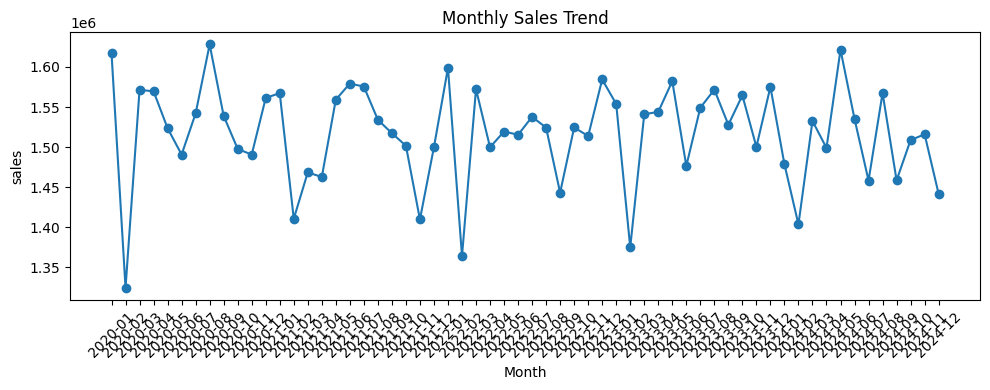

In [19]:
#monthly_trend
monthly = df.groupby('YearMonth')['sales'].sum().reset_index()
monthly['YearMonthStr'] = monthly['YearMonth'].astype(str)

plt.figure(figsize=(10,4))
plt.plot(monthly['YearMonthStr'], monthly['sales'], marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("sales")
plt.tight_layout()
plt.show()

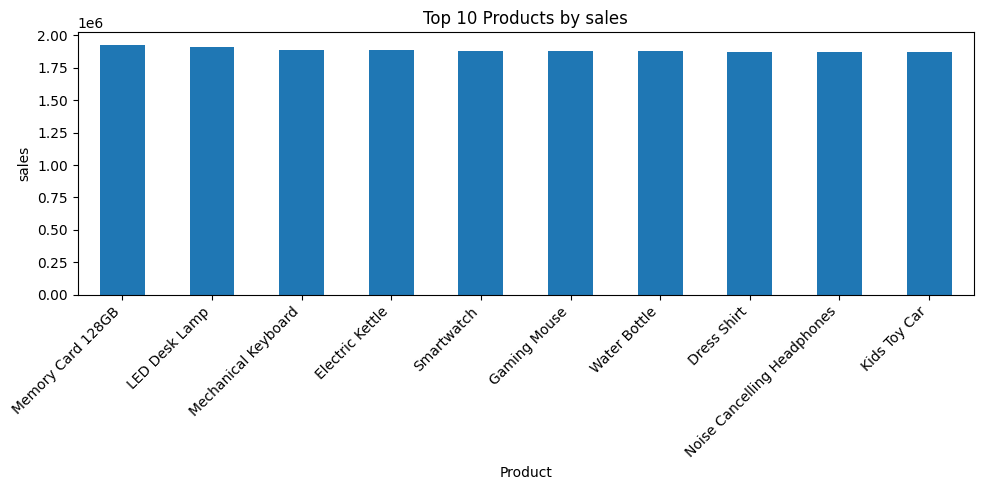

In [20]:
#top_products
top_products = df.groupby('ProductName')['sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
top_products.plot(kind='bar')
plt.title("Top 10 Products by sales")
plt.xlabel("Product")
plt.ylabel("sales")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

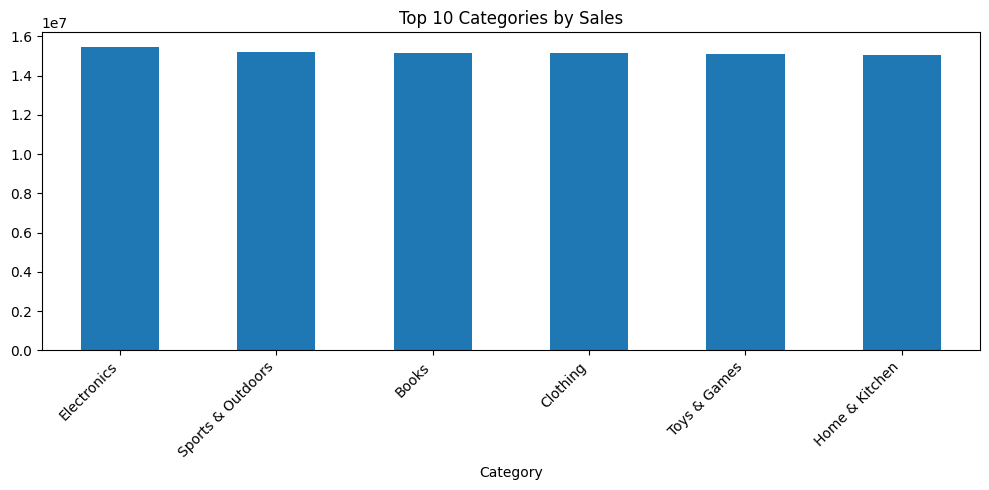

In [21]:
#category_sales
if 'Category' in df.columns:
    cat_sales = df.groupby('Category')['sales'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10,5))
    cat_sales.plot(kind='bar')
    plt.title("Top 10 Categories by Sales")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

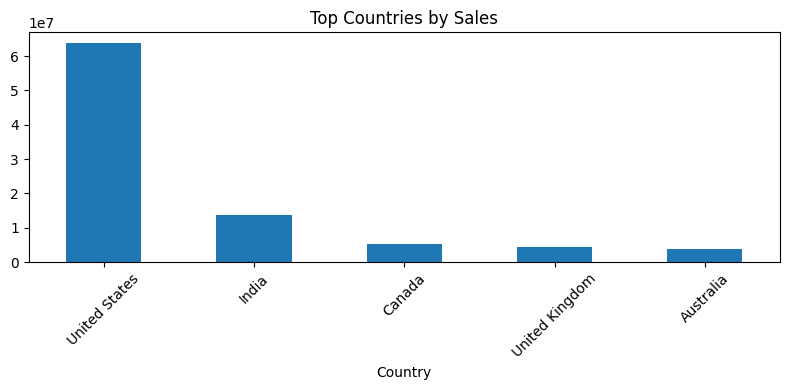

In [22]:
#country_sales
if 'Country' in df.columns:
    country_sales = df.groupby('Country')['sales'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(8,4))
    country_sales.plot(kind='bar')
    plt.title("Top Countries by Sales")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

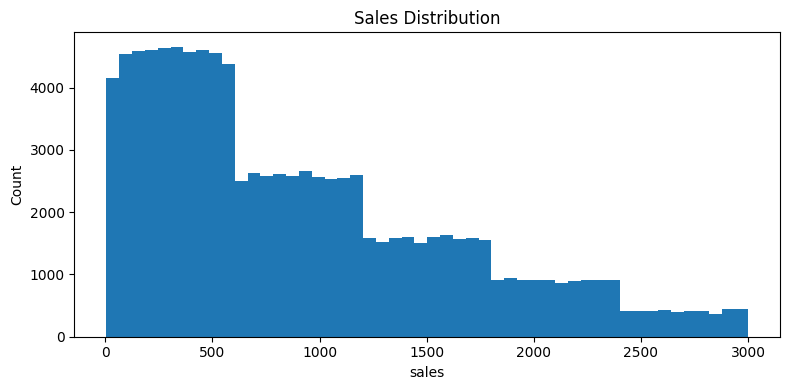

In [23]:
#sales_distribution
plt.figure(figsize=(8,4))
plt.hist(df['sales'].dropna(), bins=50)
plt.title("Sales Distribution")
plt.xlabel("sales")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [24]:
top_customers = df.groupby('CustomerID')['sales'].sum().sort_values(ascending=False).head(10)
print(top_customers)

CustomerID
CUST023748    14558.68
CUST009614    11769.78
CUST004883    11446.29
CUST046344    11094.55
CUST001153    11089.87
CUST000787    11086.95
CUST034178    10893.03
CUST045687    10747.49
CUST015231    10466.95
CUST048737    10387.97
Name: sales, dtype: float64


In [25]:
payment_method = df["PaymentMethod"].value_counts()
print(payment_method)

PaymentMethod
Credit Card         35038
Debit Card          20024
UPI                 15066
Amazon Pay          15017
Net Banking          9927
Cash on Delivery     4928
Name: count, dtype: int64


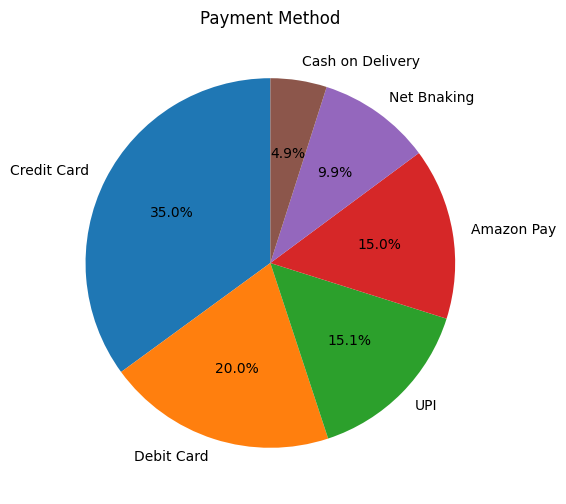

In [26]:
#Payment Method
sizes = [35038,20024,15066,15017,9927,4928]
labels = ["Credit Card", "Debit Card","UPI","Amazon Pay","Net Bnaking","Cash on Delivery"]
colors = ["blue","red","pink","grey","yellow"]
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title("Payment Method")
plt.show()

In [27]:
status = df['OrderStatus'].value_counts(normalize=True) * 100
print(status)

OrderStatus
Delivered    74.628
Shipped      15.192
Pending       4.103
Returned      3.049
Cancelled     3.028
Name: proportion, dtype: float64


In [28]:
# insights
total_sales = df['sales'].sum()
aov = df['sales'].mean()
top_month = monthly.loc[monthly['sales'].idxmax()]
top_product = df.groupby('ProductName')['sales'].sum().idxmax()
delivered_pct = (df['OrderStatus']=='Delivered').mean() * 100

print("Total Sales:", total_sales)
print("Average Order Value:", aov)
print("Top month:", top_month['YearMonth'])
print("Top product:", top_product)
print("Delivered %:", delivered_pct)

Total Sales: 91021212.99000001
Average Order Value: 910.2121299000001
Top month: 2020-08
Top product: Memory Card 128GB
Delivered %: 74.628
